## Task 3: Data Science Project Using Python

### Data loading and inspection

In [59]:
# 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [42]:
# 2. Load Dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
# 3. Inspect Dataset
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())

Shape of dataset: (200, 5)

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicates: 0

Data types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Summary statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000     

### Preprocessing and feature scaling

In [44]:
# 4. Data Preprocessing
# Drop CustomerID (not useful for clustering)
df.drop('CustomerID', axis=1, inplace=True)

In [46]:
# Convert Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Optional: Show scaled data
print("\nFirst 5 scaled rows:\n", scaled_features[:5])


First 5 scaled rows:
 [[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]]


### KMeans clustering with optimal k using Elbow and Silhouette

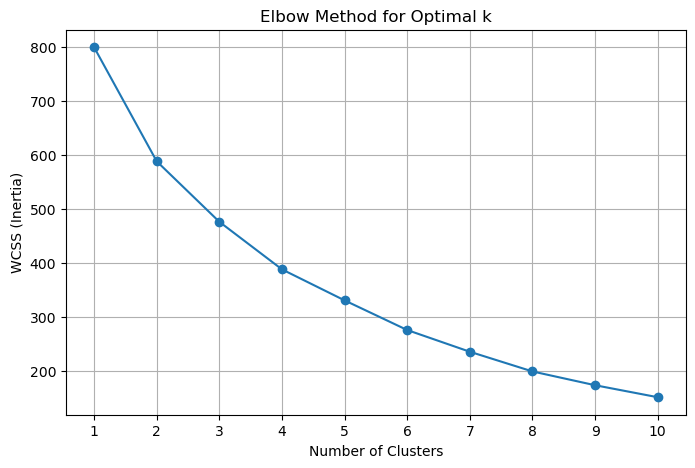

In [47]:
# 5. Elbow Method to Determine Optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [48]:
# Optional: Silhouette Score (optional evaluation)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, preds)
    print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=2: 0.2518
Silhouette Score for k=3: 0.2595
Silhouette Score for k=4: 0.2984
Silhouette Score for k=5: 0.3041
Silhouette Score for k=6: 0.3311
Silhouette Score for k=7: 0.3574
Silhouette Score for k=8: 0.3880
Silhouette Score for k=9: 0.4031
Silhouette Score for k=10: 0.4208


### Visualization with 2D PCA, 3D plot, pairplot

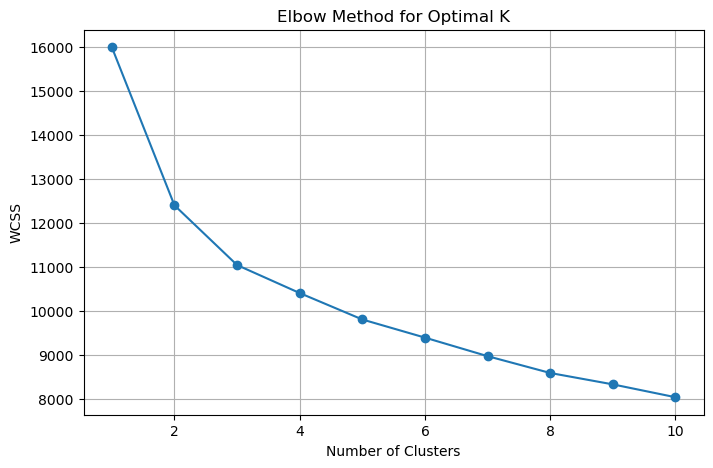

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [21]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for {k} clusters: {score:.3f}")


Silhouette Score for 2 clusters: 0.226
Silhouette Score for 3 clusters: 0.192
Silhouette Score for 4 clusters: 0.162
Silhouette Score for 5 clusters: 0.135
Silhouette Score for 6 clusters: 0.134


In [50]:
# 6. Apply KMeans with Optimal k (e.g., 5 based on Elbow or Silhouette)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

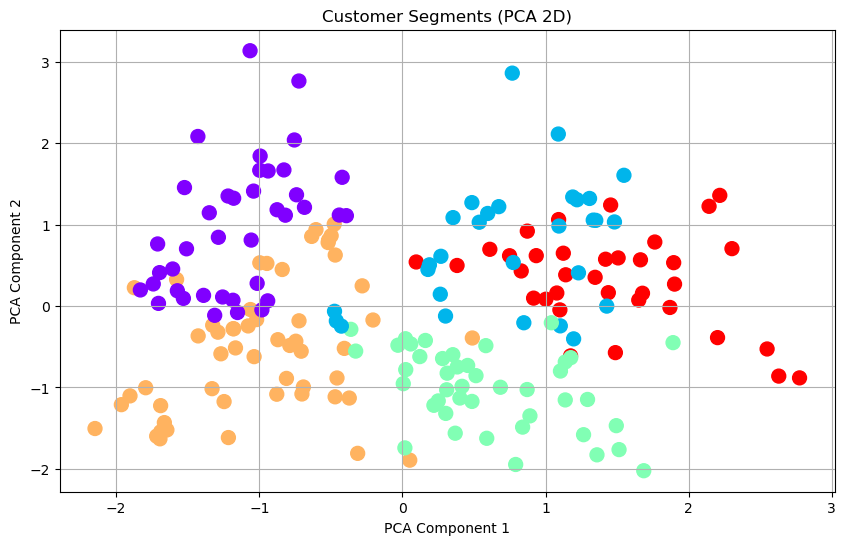

In [51]:
# 7. 2D PCA Scatter Plot
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='rainbow', s=100)
plt.title('Customer Segments (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

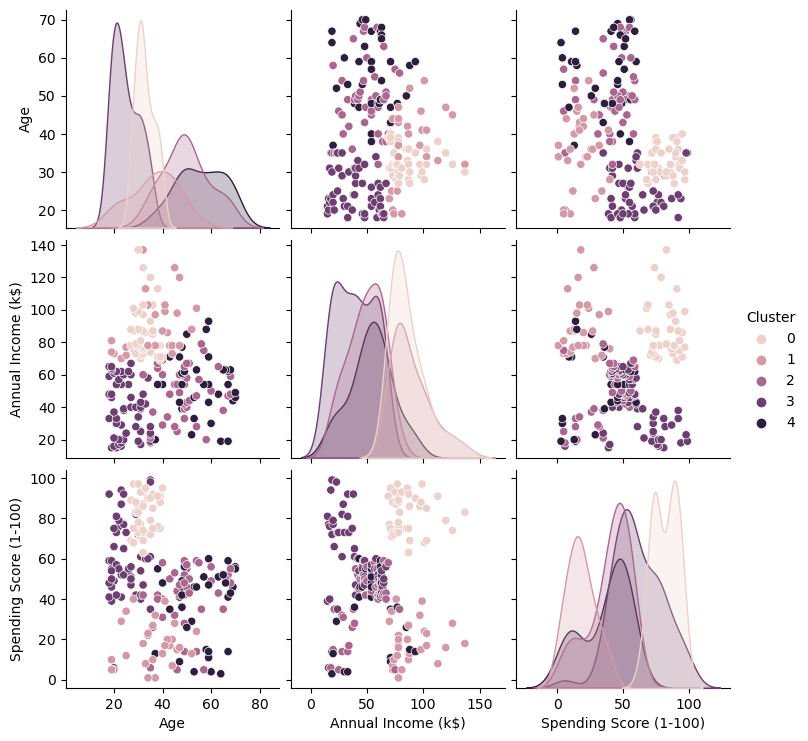

In [52]:
# 8. Pair Plot of Clustered Data
sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

In [53]:
# 9. 3D Scatter Plot
trace = go.Scatter3d(
    x=df['Age'],
    y=df['Annual Income (k$)'],
    z=df['Spending Score (1-100)'],
    mode='markers',
    marker=dict(
        size=8,
        color=df['Cluster'],
        colorscale='Viridis',
        opacity=0.8
    )
)

layout = go.Layout(
    title='3D Customer Segments',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Annual Income (k$)'),
        zaxis=dict(title='Spending Score (1-100)')
    )
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


### Cluster assignment and saving the results

In [54]:
# 10. Save Clustered Data
df.to_csv("segmented_customers.csv", index=False)
print("\nClustered dataset saved as 'segmented_customers.csv'.")


Clustered dataset saved as 'segmented_customers.csv'.


### Cluster-wise statistics for recommendations

In [55]:
# 11. Basic Insights (Example)
for i in range(k_opt):
    print(f"\nCluster {i} stats:")
    print(df[df['Cluster'] == i].describe())



Cluster 0 stats:
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
count  39.000000  39.000000           39.000000               39.000000   
mean    0.538462  32.692308           86.538462               82.128205   
std     0.505035   3.728650           16.312485                9.364489   
min     0.000000  27.000000           69.000000               63.000000   
25%     0.000000  30.000000           75.500000               74.500000   
50%     1.000000  32.000000           79.000000               83.000000   
75%     1.000000  35.500000           95.000000               90.000000   
max     1.000000  40.000000          137.000000               97.000000   

       Cluster  
count     39.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Cluster 1 stats:
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
count  29.000000  29.000000           29.000000             

In [58]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,32.692308,86.538462,82.128205
1,36.482759,89.517241,18.000000
2,49.813953,49.232558,40.069767
3,24.907407,39.722222,61.203704
4,55.714286,53.685714,36.771429


### 🎯 Marketing Strategy Recommendations

#### Cluster 0: Young, Low Income, High Spending
Profile: Young customers (~25), low income, high spending

Action:

Offer student discounts, installment plans

Promote trendy or fast-fashion products

Leverage social media marketing

Potential: Good for promotions that build long-term loyalty

#### Cluster 1: Middle-Aged, High Income, Low Spending
Profile: Middle-aged (~40), high income, low spending

Action:

Target with luxury or premium bundles

Offer exclusive loyalty benefits to increase basket size

Educate on value or quality via email marketing

Potential: High — they can spend more if nudged correctly

#### Cluster 2: Professionals with High Income & High Spending
Profile: Age ~35, very high income & spending

Action:

Offer premium memberships, VIP experiences

Propose loyalty programs with cashback/rewards

Provide personalized recommendations

Potential: Top-tier customers, retain with exceptional service

#### Cluster 3: Seniors, Low Income, Low Spending
Profile: Older (~60), lower income and spending

Action:

Offer value-based pricing

Introduce senior benefits or bundles

Use offline channels for engagement

Potential: Focus on basic retention, not aggressive upsell

#### Cluster 4: Young Adults, Mid Income, Moderate Spending
Profile: Late 20s, moderate income/spending

Action:

Incentivize with seasonal discounts or referral bonuses

Push mobile-first campaigns

Convert into higher-spending group with gamified offers

Potential: Nurture into power users

### 📌 Summary Table of Actions
Cluster	Strategy Highlights

0-	Promote discounts & trendy products

1-	Loyalty programs & premium offers

2-	VIP experiences & personalized service

3-	Value bundles & basic engagement

4-	Referral bonuses & growth incentives